In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('revenue_cleaned.csv')
melted = pd.melt(df, id_vars=['Cust_ID','Product Group'], var_name="Month", value_name="Revenue")

In [15]:
melted['Year']=melted['Month'].str.split(pat='/', expand=True)[2]
# melted.to_csv('melted_ff.csv', index=False)

In [16]:
sorted_df = melted.sort_values(by=['Product Group','Revenue'], ascending=False)

In [26]:
ff_sorted = sorted_df.loc[sorted_df['Product Group']=='FraudFinder']
ff2_sorted = sorted_df.loc[sorted_df['Product Group']=='FraudFinder 2.0.']
other_sorted = sorted_df.loc[sorted_df['Product Group']=='Other']

In [27]:
ff_sum = ff_sorted.groupby(['Cust_ID','Year'])['Revenue'].sum().reset_index()
ff_sum = ff_sum.sort_values(by='Revenue', ascending=False)
ff2_sum = ff2_sorted.groupby(['Cust_ID','Year'])['Revenue'].sum().reset_index()
ff2_sum = ff2_sum.sort_values(by='Revenue', ascending=False)
other_sum = other_sorted.groupby(['Cust_ID','Year'])['Revenue'].sum().reset_index()
other_sum = other_sum.sort_values(by='Revenue', ascending=False)


In [28]:
ff_sum = ff_sum.loc[ff_sum.Revenue !=0]
ff2_sum = ff2_sum.loc[ff2_sum.Revenue !=0]
other_sum = other_sum.loc[other_sum.Revenue !=0]

In [29]:
ff_sum['Product'] = 'FraudFinder'
ff2_sum['Product'] = 'FraudFinder 2.0.'
other_sum['Product'] = 'Other'

In [30]:
df2 = ff_sum.append(ff2_sum)

In [31]:
df2 = df2.append(other_sum)

In [71]:
df2.sort_values(['Year','Revenue'])
y2011 = df2.loc[df2.Year=='2011']
top50_2011 = y2011[0:50]

In [54]:
transmax = pd.read_csv('usage_cleaned.csv')
len(transmax)

5258

In [55]:
outliers = transmax[transmax['# Transactions'] > transmax['# Transactions'].mean() + 3 * transmax['# Transactions'].std()]
len(outliers)

16

In [306]:
transmax2 = transmax[np.abs(transmax['# Transactions']-transmax['# Transactions'].mean()) <= (3*transmax['# Transactions'].std())]
transmax2.describe()

,# Transactions,Year
count,5.242000e+03,5242.000000
mean,5.220290e+05,2011.123998
std,2.092819e+06,0.802757
min,0.000000e+00,2010.000000
25%,5.400000e+01,2010.000000
50%,1.662100e+04,2011.000000
75%,1.883610e+05,2012.000000
max,3.708062e+07,2012.000000


In [293]:
transmax2.loc[transmax2.Year==2011].sort_values("# Transactions", ascending=True)\
        [0:10]['# Transactions'].mean()

0.0

In [298]:
transmax_nonull = transmax2.loc[transmax2['# Transactions']!=0]

In [299]:
years = transmax_nonull.Year.unique()
years

array([2010, 2011, 2012])

In [300]:
def top50(n, adf, asc, avg_tx):
    years = transmax_nonull.Year.unique()
    if asc == True:
        sort = 'Bottom'
    else:
        sort = 'Top'
    for item in years:
        cust = transmax_nonull.loc[transmax_nonull.Year==item].sort_values('# Transactions', ascending=asc)\
        [0:n].sort_values('# Transactions', ascending=asc)['Customer'].values
        
        adf[f'{item} {sort} {n}'] = melted.loc[melted['Cust_ID'].isin(cust)].groupby('Product Group')['Revenue'].sum()
    
        avg_tx.append(transmax_nonull.loc[transmax_nonull.Year==item].sort_values("# Transactions", ascending=asc)\
        [0:n]['# Transactions'].mean())


In [301]:
def revbyrank(adf, avg_tx):
    ranks = [10, 50, 100, 250]
    cond = [True, False]
    for con in cond:
        for item in ranks:
            top50(item, adf, con, avg_tx)
        

In [310]:
adf = pd.DataFrame(columns=['2010 Bottom 10', '2011 Bottom 10', '2012 Bottom 10', '2010 Bottom 50', '2011 Bottom 50', '2012 Bottom 50', '2010 Bottom 100', '2011 Bottom 100', '2012 Bottom 100', '2010 Bottom 250', '2011 Bottom 250', '2012 Bottom 250', '2010 Top 10', '2011 Top 10', '2012 Top 10', '2010 Top 50', '2011 Top 50', '2012 Top 50', '2010 Top 100', '2011 Top 100', '2012 Top 100', '2010 Top 250', '2011 Top 250', '2012 Top 250'])
avg_tx = []
revbyrank(adf, avg_tx)

In [311]:
adf = adf.transpose()
len(adf)

24

In [314]:
adf['Avg. Max Transaction'] = avg_tx
len(avg_tx)

24

/Users/laura/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


Text(0.5, 0, 'Revenue from top X users per year')

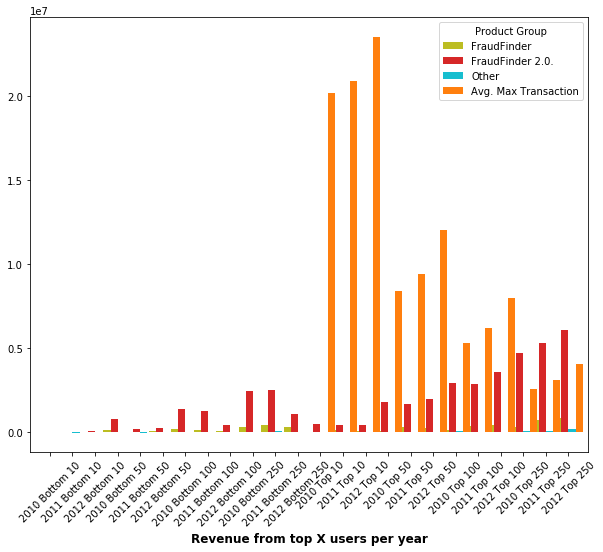

In [317]:
adf.plot(kind='bar', figsize=(10,8), legend=True, colors=['tab:olive','tab:red','tab:cyan','tab:orange'], rot=45, width=1.25)

plt.xlabel('Revenue from top X users per year', fontsize=12, fontweight='bold')
# plt.ylabel('Revenue', fontsize=12, fontweight='bold')
# plt.title('Total Revenue per Product Group Over Time', fontsize=14, fontweight='bold')
# plt.legend(loc='best')
# plt.savefig('./revenue_summary.png',transparent=False, dpi=80, bbox_inches="tight")

In [57]:
df3 = df2.merge(transmax2, left_on=['Cust_ID'], right_on=['Customer'])
df3.head()

,Cust_ID,Year_x,Revenue,Product,Customer,# Transactions,Year_y
0,CUSTOMER 774,2010,90375.80,FraudFinder,CUSTOMER 774,192,2011
1,CUSTOMER 774,2012,19028.85,FraudFinder,CUSTOMER 774,192,2011
2,CUSTOMER 774,2011,15838.20,FraudFinder,CUSTOMER 774,192,2011
3,CUSTOMER 774,2013,11811.00,FraudFinder,CUSTOMER 774,192,2011
4,CUSTOMER 774,2012,139199.66,FraudFinder 2.0.,CUSTOMER 774,192,2011


In [42]:
df3.drop_duplicates(keep='first', inplace=True)

In [119]:
# df3

In [44]:
df3['Year_x'] = df3['Year_x'].astype(int)
df3 = df3[df3['Year_x'] == df3['Year_y']] 
df3 = df3.drop(columns='Year_y', axis=1)
df3 = df3.rename(columns={'Year_x':'Year'})
# df3.to_csv('transactions.csv')

In [120]:
# df3

In [46]:
df3 = df3.loc[df3['# Transactions'] != 0]
df_ff2 = df3.loc[df3['Product'] == 'FraudFinder 2.0.']
df_ff = df3.loc[df3['Product'] == 'FraudFinder']
df_o = df3.loc[df3['Product'] == 'Other']

No handles with labels found to put in legend.


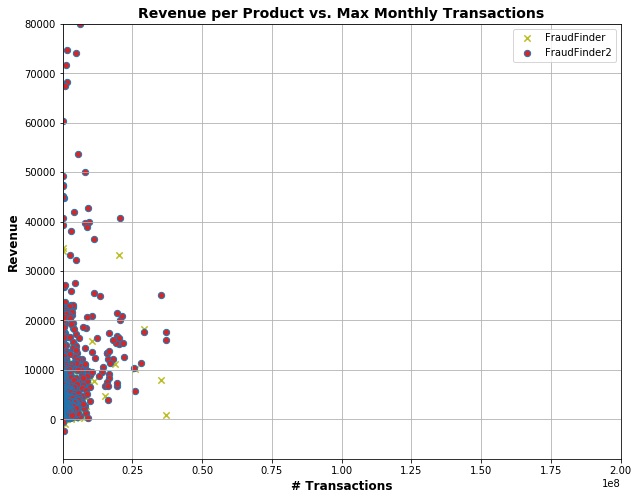

In [47]:
fig, ax = plt.subplots(figsize=(10,8), subplot_kw={'ylim':(-8000,80000), 'xlim':(0,2e8)})
plt.xlabel('Transactions', fontsize=12, fontweight='bold')
plt.ylabel('Revenue', fontsize=12, fontweight='bold')
plt.title(f"Revenue per Product vs. Max Monthly Transactions", fontsize=14, fontweight='bold')
plt.legend(loc='best')
# plt.savefig('.revtrans.png')
df_ff.plot(ax=ax, kind="scatter", grid=True, x='# Transactions',y="Revenue", s=40, color="tab:olive", edgecolors="tab:blue", marker='x', label='FraudFinder')
df_ff2.plot(ax=ax, kind="scatter", grid=True, x='# Transactions',y="Revenue", s=40, color="tab:red", edgecolors="tab:blue", marker='o', label='FraudFinder2')
# df_o.plot(ax=ax, kind="scatter", grid=True, x='# Transactions',y="Revenue", s=40, color="tab:cyan", edgecolors="tab:blue", marker='.', label='Other')
